In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.DataFrame.from_csv("AmesHousing.tsv",sep = '\t')

In [3]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [4]:
drop_cols = df.isnull().sum()
drop_cols

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [5]:
drop_cols = drop_cols[drop_cols < 0.25*len(drop_cols)]
drop_cols

PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
                  ..
Electrical         1
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     2
Bsmt Half Bath     2
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Cars        1
Garage Area  

In [6]:
df=df[drop_cols.index]
df

,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,195500
7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,4,2010,WD,Normal,213500
8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,191500
9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,236500


In [7]:
df = df.fillna(df.mean())
df.isnull().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
                  ..
Electrical         1
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Cars        0
Garage Area  

In [8]:
def transform_features_test(df):
    drop_cols = df.isnull().sum()
    drop_cols = drop_cols[drop_cols < 0.25*len(drop_cols)].index
    df = df[drop_cols]
    df = df.fillna(df.mean())
    
    drop_cols2 = df.isnull().sum()
    drop_cols2 = drop_cols2[drop_cols2 == 0].index
    df = df[drop_cols2]
    return df
haha = transform_features_test(df)
haha

,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,195500
7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,4,2010,WD,Normal,213500
8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,191500
9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,236500


In [9]:
def transform_features(df):
    drop_cols = df.isnull().sum()
    drop_cols = drop_cols[drop_cols < 0.25*len(drop_cols)].index
    df = df[drop_cols]
    df = df.fillna(df.mean())
    
    drop_cols2 = df.isnull().sum()
    drop_cols2 = drop_cols2[drop_cols2 == 0].index
    df = df[drop_cols2]
    
    df['year_since_sold'] = df['Yr Sold'] - df['Year Built']
    df['year_since_remod_add'] = df['Year Remod/Add'] - df['Yr Sold']
    
    df = df.drop('Yr Sold',1)
    df = df.drop('Year Remod/Add',1)
    df = df.drop('Year Built',1)
    return df
def select_features(train_df):
    return train_df[['Gr Liv Area','SalePrice']]

In [10]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include = ['float','integer'])
    
    numeric_test = test.select_dtypes(include = ['float','integer'])
    
    features = numeric_train.columns.drop('SalePrice')
    
    
    # train the model
    lr = LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    pre = lr.predict(test[features])
    mse = mean_squared_error(pre,test['SalePrice'])
    rmse = mse**0.5
    return rmse

In [11]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.251612639091

Heatmap
====

In [19]:
corr = abs(df.corr())
corr = corr['SalePrice']
corr = corr[corr > 0.5].index
corr

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype='object')

In [20]:
matrix = df[corr].corr()

In [21]:
matrix

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
Overall Qual,1.000000,0.597027,0.569609,0.429418,0.547294,0.477837,0.570556,0.522263,0.570569,0.599545,0.563503,0.799262
Year Built,0.597027,1.000000,0.612095,0.313292,0.407526,0.310463,0.241726,0.469406,0.834849,0.537443,0.480131,0.558426
Year Remod/Add,0.569609,0.612095,1.000000,0.196928,0.297481,0.242108,0.316855,0.457266,0.652310,0.425403,0.376438,0.532974
Mas Vnr Area,0.429418,0.313292,0.196928,1.000000,0.397040,0.395736,0.403611,0.260153,0.254784,0.360159,0.373458,0.508285
Total Bsmt SF,0.547294,0.407526,0.297481,0.397040,1.000000,0.800720,0.444675,0.324973,0.347571,0.437608,0.485504,0.632280
1st Flr SF,0.477837,0.310463,0.242108,0.395736,0.800720,1.000000,0.562166,0.371584,0.260170,0.439458,0.491223,0.621676
Gr Liv Area,0.570556,0.241726,0.316855,0.403611,0.444675,0.562166,1.000000,0.630321,0.272848,0.488829,0.484892,0.706780
Full Bath,0.522263,0.469406,0.457266,0.260153,0.324973,0.371584,0.630321,1.000000,0.494397,0.478182,0.407464,0.545604
Garage Yr Blt,0.570569,0.834849,0.652310,0.254784,0.347571,0.260170,0.272848,0.494397,1.000000,0.586731,0.555019,0.526965
Garage Cars,0.599545,0.537443,0.425403,0.360159,0.437608,0.439458,0.488829,0.478182,0.586731,1.000000,0.889676,0.647877


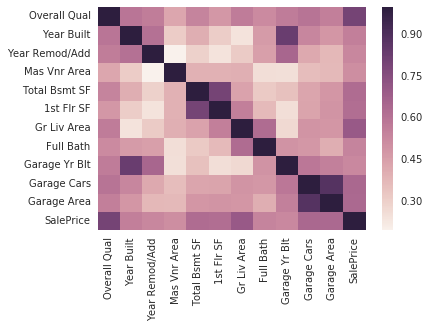

In [24]:
import seaborn as sns
%matplotlib inline
sns.heatmap(matrix)

nominal
=====

In [50]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
nominal = ['PID','MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood',
          'Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
        'Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature',
           'Sale Type','Sale Condition']
cols =[]
for col in nominal:
    haha = df[col].value_counts()
    if len(haha) < 10:
        cols.append(col)
if col in cols:
    if col in corr:
        print(col)

In [51]:
def select_features(df,correlation_threshold,unique_threshold):
    cols =[]
    # find columns whose correlation with SalePrice more than correlation_threshold
    df_corr = df.corr()
    df_saleprice = df_corr['SalePrice']
    df_saleprice_th_cols = df_saleprice[df_saleprice > correlation_threshold].index
        
    # for better model, using uniqueness to delete some useless columns
    nominal = ['PID','MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood',
          'Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
        'Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature',
           'Sale Type','Sale Condition']
    for col in nominal:
        haha = df[col].value_counts()
        if len(haha) < unique_threshold:
            if col in df_saleprice_th_cols:
                cols.append(col)
    
    return df[cols]

In [52]:
select_features(df,0.51,10)
# according to the few cells above, we suppose to get null

""
0
1
2
3
4
5
6
7
8
9


In [58]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, shuffle=True)
A = [[1,2],[3,4],[5,6],[7,8],[4,5],[9,10]]

In [61]:
for train_ind,test_ind in kf.split(A):
    print('trian:',train_ind)
    print('test:',test_ind)

trian: [1 2 4]
test: [0 3 5]
trian: [0 3 5]
test: [1 2 4]


In [69]:
def select_features(train_df):
    return train_df[['Gr Liv Area','SalePrice']]
def train_and_test(df,k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        
        numeric_train = train.select_dtypes(include = ['float','integer'])
    
        numeric_test = test.select_dtypes(include = ['float','integer'])
    
        
    
    
        # train the model
        lr = LinearRegression()
        lr.fit(train[features],train['SalePrice'])
        pre = lr.predict(test[features])
        mse = mean_squared_error(pre,test['SalePrice'])
        rmse = mse**0.5
        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        numeric_one = fold_one.select_dtype(include=['float','integer'])
        numeric_two = fold_two.select_dtype(include=['float','integer'])
        
                
                
        # train the model on fold one
        lg = LinearRegression()
        lg.fit(numeric_one[features],numeric_one['SalePrice'])
        pre = lg.predict(numeric_two[features])
        mse = mean_squared_error(pre,numeric_two['SalePrice'])
        rmse1 = mse**0.5
        
        # train the model on fold two
        lg = LinearRegression()
        lg.fit(numeric_two[features],numeric_two['SalePrice'])
        pre = lg.predict(numeric_one[features])
        mse = mean_squared_error(pre,numeric_one['SalePrice'])
        rmse2 = mse**0.5
        
        rmse = (rmse1+rmse2)/2
        return rmse
        
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse = []
        for train_idx, test_idx in kf.split(df):
            train = df.iloc[train_idx]
            test = df.iloc[test_idx]
            lr = LinearRegression()
            lr.fit(train[features],train['SalePrice'])
            pre = lr.predict(test[features])
            mse = mean_squared_error(pre,test['SalePrice'])
            rmse0 = mse**0.5
            rmse.append(rmse0)
            print(rmse0)
        avg_rmse = sum(rmse)/len(rmse)
        return avg_rmse        

        
        
  

In [70]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

58756.3926638
53995.9159017
58457.6385113
56001.2016837


56802.787190121235